In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import linregress
%matplotlib inline

# File paths
player_shooting_path = "../csv/player_shooting.csv"
player_stats_path = "../csv/player_stats.csv"
player_playing_path ="../csv/player_playingtime.csv"

# Read CSV files
player_stats_df = pd.read_csv(player_stats_path)
player_shooting_df = pd.read_csv(player_shooting_path)
player_playing_df = pd.read_csv(player_playing_path)

In [2]:
#check lists of columns
list(player_stats_df)

['player',
 'position',
 'team',
 'age',
 'club',
 'birth_year',
 'games',
 'games_starts',
 'minutes',
 'minutes_90s',
 'goals',
 'assists',
 'goals_pens',
 'pens_made',
 'pens_att',
 'cards_yellow',
 'cards_red',
 'goals_per90',
 'assists_per90',
 'goals_assists_per90',
 'goals_pens_per90',
 'goals_assists_pens_per90',
 'xg',
 'npxg',
 'xg_assist',
 'npxg_xg_assist',
 'xg_per90',
 'xg_assist_per90',
 'xg_xg_assist_per90',
 'npxg_per90',
 'npxg_xg_assist_per90']

In [3]:
#Pull required columns
player_stats_clean = player_stats_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].copy()
list(player_stats_clean)

['player',
 'position',
 'team',
 'age',
 'club',
 'birth_year',
 'games',
 'games_starts',
 'minutes',
 'minutes_90s',
 'goals',
 'assists',
 'goals_pens',
 'pens_made',
 'pens_att',
 'cards_yellow',
 'cards_red',
 'goals_per90',
 'assists_per90']

In [4]:
#check lists of columns
list(player_shooting_df)

['player',
 'position',
 'team',
 'age',
 'birth_year',
 'minutes_90s',
 'goals',
 'shots',
 'shots_on_target',
 'shots_on_target_pct',
 'shots_per90',
 'shots_on_target_per90',
 'goals_per_shot',
 'goals_per_shot_on_target',
 'average_shot_distance',
 'shots_free_kicks',
 'pens_made',
 'pens_att',
 'xg',
 'npxg',
 'npxg_per_shot',
 'xg_net',
 'npxg_net']

In [5]:
#Pull required columns
player_shooting_clean = player_shooting_df.iloc[:,[0,7,8,9,10,12]].copy()
list(player_shooting_clean)

['player',
 'shots',
 'shots_on_target',
 'shots_on_target_pct',
 'shots_per90',
 'goals_per_shot']

In [6]:
#check lists of columns
list(player_playing_df)

['player',
 'position',
 'team',
 'age',
 'birth_year',
 'games',
 'minutes',
 'minutes_per_game',
 'minutes_pct',
 'minutes_90s',
 'games_starts',
 'minutes_per_start',
 'games_complete',
 'games_subs',
 'minutes_per_sub',
 'unused_subs',
 'points_per_game',
 'on_goals_for',
 'on_goals_against',
 'plus_minus',
 'plus_minus_per90',
 'plus_minus_wowy',
 'on_xg_for',
 'on_xg_against',
 'xg_plus_minus',
 'xg_plus_minus_per90',
 'xg_plus_minus_wowy']

In [7]:
#Pull required columns
player_playing_clean = player_playing_df.iloc[:,[0,7, 11,13]].copy()
list(player_playing_clean)

['player', 'minutes_per_game', 'minutes_per_start', 'games_subs']

In [8]:
# Merge dataframes using the 'player' column as the common key
merged_df = pd.merge(player_stats_clean, player_shooting_clean, on="player", how="inner")
merged_df = pd.merge(merged_df, player_playing_clean, on="player", how="inner")


# Save the merged dataframe to a new CSV file
#merged_df.to_csv("merged_player_data.csv", index=False)

# Display the merged dataframe
merged_df_complete = pd.DataFrame(merged_df)
merged_df_complete

,player,position,team,age,club,birth_year,games,games_starts,minutes,minutes_90s,...,goals_per90,assists_per90,shots,shots_on_target,shots_on_target_pct,shots_per90,goals_per_shot,minutes_per_game,minutes_per_start,games_subs
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,...,0.00,0.00,1,0,0.0,0.25,0.00,90.0,90.0,0
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,...,0.00,0.00,1,0,0.0,0.34,0.00,89.0,89.0,0
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,1996,5,2,181,2.0,...,0.00,0.50,3,0,0.0,1.49,0.00,36.0,55.0,3
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,1993,3,3,270,3.0,...,0.00,0.00,6,0,0.0,2.00,0.00,90.0,90.0,0
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,1990,4,0,68,0.8,...,0.00,0.00,2,1,50.0,2.65,0.00,17.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,MF,Argentina,34-307,Juventus,1988,5,4,288,3.2,...,0.31,0.31,6,3,50.0,1.87,0.17,58.0,70.0,1
676,Ángelo Preciado,DF,Ecuador,24-303,Genk,1998,3,3,264,2.9,...,0.00,0.34,4,0,0.0,1.36,0.00,88.0,88.0,0
677,Éder Militão,DF,Brazil,24-334,Real Madrid,1998,4,4,347,3.9,...,0.00,0.00,5,1,20.0,1.30,0.00,87.0,87.0,0
678,Óscar Duarte,DF,Costa Rica,33-198,Al-Wehda,1989,3,3,270,3.0,...,0.00,0.00,0,0,NaN,0.00,NaN,90.0,90.0,0


In [9]:
list(merged_df_complete.columns)

['player',
 'position',
 'team',
 'age',
 'club',
 'birth_year',
 'games',
 'games_starts',
 'minutes',
 'minutes_90s',
 'goals',
 'assists',
 'goals_pens',
 'pens_made',
 'pens_att',
 'cards_yellow',
 'cards_red',
 'goals_per90',
 'assists_per90',
 'shots',
 'shots_on_target',
 'shots_on_target_pct',
 'shots_per90',
 'goals_per_shot',
 'minutes_per_game',
 'minutes_per_start',
 'games_subs']

In [10]:
# Count the number of players per team
players_per_team = merged_df_complete.groupby('team')['player'].count().reset_index()

# Display the result
players_per_team

,team,player
0,Argentina,24
1,Australia,20
2,Belgium,20
3,Brazil,26
4,Cameroon,22
5,Canada,19
6,Costa Rica,22
7,Croatia,21
8,Denmark,20
9,Ecuador,18


In [11]:
# calculate the age of players
current_year = datetime.now().year
merged_df_complete['age'] = current_year - merged_df_complete['birth_year']

# Create a new DataFrame with player name and age
player_age_df = merged_df_complete[['player', 'age']]

# Display the resulting DataFrame
player_age_df

,player,age
0,Aaron Mooy,33
1,Aaron Ramsey,33
2,Abdelhamid Sabiri,27
3,Abdelkarim Hassan,30
4,Abderrazak Hamdallah,33
...,...,...
675,Ángel Di María,35
676,Ángelo Preciado,25
677,Éder Militão,25
678,Óscar Duarte,34


In [13]:
# Calculate the average age of players per team 
players_age_per_team = merged_df_complete.groupby('team')['age'].mean().round(1).reset_index()

# Rename age column
players_age_per_team = players_age_per_team.rename(columns={'age': 'avg age per team'})

# Display the result
players_age_per_team

,team,avg age per team
0,Argentina,28.4
1,Australia,28.3
2,Belgium,29.3
3,Brazil,29.0
4,Cameroon,27.9
5,Canada,28.7
6,Costa Rica,28.6
7,Croatia,28.8
8,Denmark,28.0
9,Ecuador,25.7


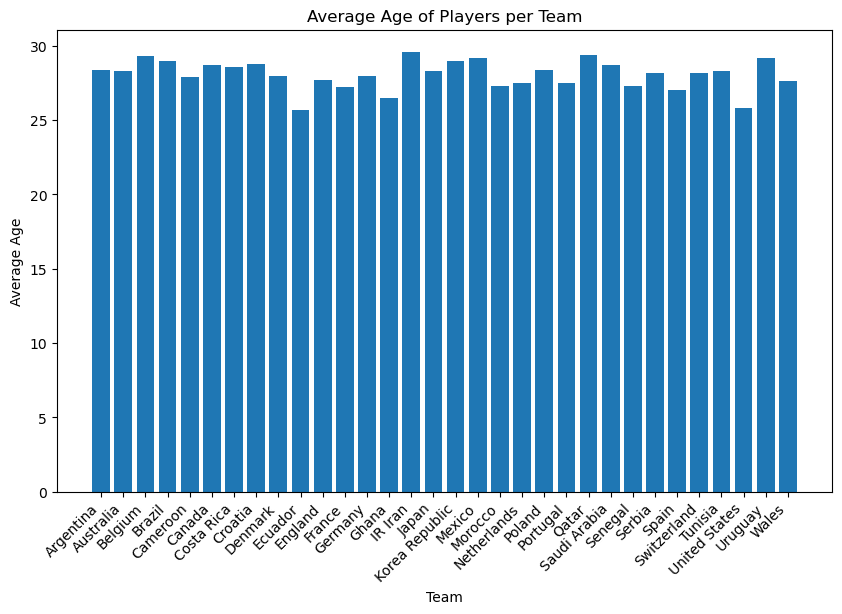

In [14]:
# Plot a bar chart for average age of players per team 
plt.figure(figsize=(10, 6))
plt.bar(players_age_per_team['team'], players_age_per_team['avg age per team'])
plt.title('Average Age of Players per Team')
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [15]:
# Calculate the average age of players per position and per team, rounded to 1 decimal point
players_age_per_position_team = merged_df_complete.groupby(['position', 'team'])['age'].mean().round(1).reset_index()

# Rename age column
players_age_per_position_team = players_age_per_position_team.rename(columns={'age': 'avg age per position'})


# Display the result
players_age_per_position_team

,position,team,avg age per position
0,DF,Argentina,28.4
1,DF,Australia,27.7
2,DF,Belgium,31.6
3,DF,Brazil,31.8
4,DF,Cameroon,27.3
...,...,...,...
123,MF,Switzerland,29.2
124,MF,Tunisia,27.2
125,MF,United States,24.2
126,MF,Uruguay,26.4


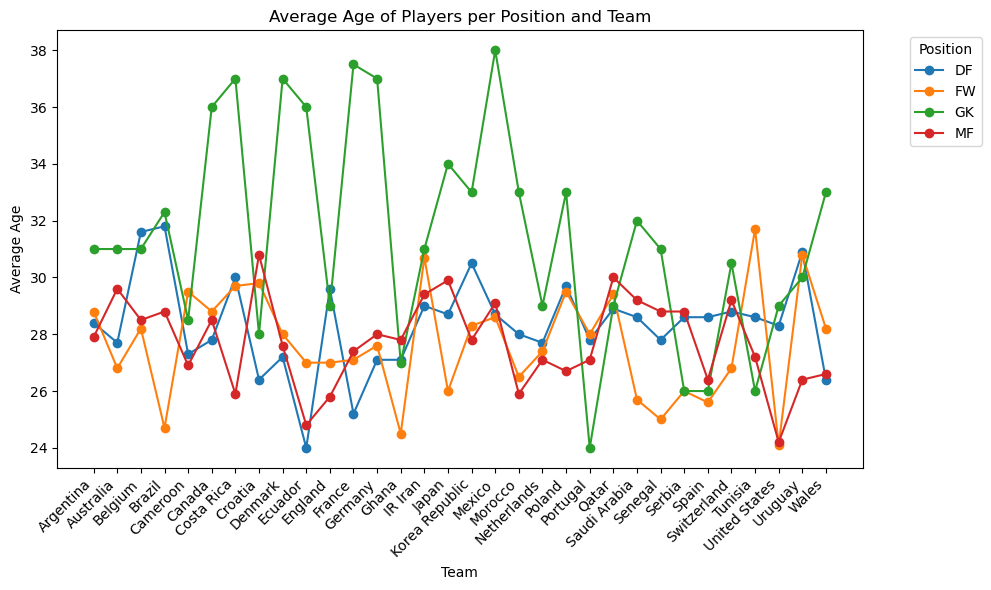

In [16]:
# Plot a line graph for average age of players per position and team 
plt.figure(figsize=(10,6))

# Iterate over each unique position
for position in players_age_per_position_team['position'].unique():
    position_data = players_age_per_position_team[players_age_per_position_team['position'] == position]
    plt.plot(position_data['team'], position_data['avg age per position'], label=position, marker='o')

plt.title('Average Age of Players per Position and Team')
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

## Goals Scored by Age Analysis

In [17]:
birth_year_goals = merged_df_complete.iloc[:,[0,5, 10,]].copy()
birth_year_goals

,player,birth_year,goals
0,Aaron Mooy,1990,0
1,Aaron Ramsey,1990,0
2,Abdelhamid Sabiri,1996,0
3,Abdelkarim Hassan,1993,0
4,Abderrazak Hamdallah,1990,0
...,...,...,...
675,Ángel Di María,1988,1
676,Ángelo Preciado,1998,0
677,Éder Militão,1998,0
678,Óscar Duarte,1989,0


In [37]:
#Count number of players that didn't score goals
zero_goals = birth_year_goals['goals'].value_counts()[0]

print(f"{zero_goals} players scored zero goals.")

563 players scored zero goals.


In [18]:
#Drop players that had zero goals
goal_scorers = birth_year_goals.drop(birth_year_goals[birth_year_goals['goals'] == 0].index)
goal_scorers

,player,birth_year,goals
14,Achraf Dari,1999,1
16,Adrien Rabiot,1995,1
25,Aleksandar Mitrović,1994,2
30,Alexis Mac Allister,1998,1
45,Alphonso Davies,2000,1
...,...,...,...
662,Youssef En-Nesyri,1997,2
671,Zakaria Aboukhlal,2000,1
672,Álvaro Morata,1992,3
675,Ángel Di María,1988,1


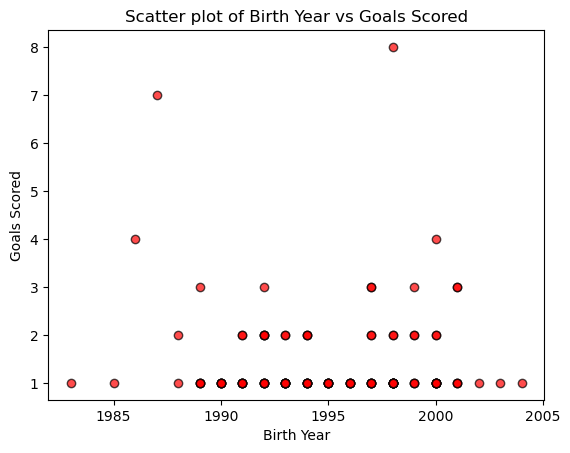

In [20]:
#Plot graph of year of birth vs goals scored
plt.scatter(goal_scorers['birth_year'], goal_scorers['goals'], edgecolors="black", facecolors="red", 
            alpha=0.7)
plt.xlabel("Birth Year")
plt.ylabel("Goals Scored")
plt.title("Scatter plot of Birth Year vs Goals Scored")
plt.show()


# Analysis
The darker "red markers" indicate that multiple goal scorers were born on those respective years. There is a larger concentration of goal scorers who only scored one goal scattered across multiple years. There is no direct correlation between the year a player was born and the number of goals they scored

In [45]:
#Find number of players and the amount of goals they scored
year_goals_count=goal_scorers.groupby(["goals"])["player"].count().reset_index()
year_goals_count

,goals,player
0,1,86
1,2,20
2,3,7
3,4,2
4,7,1
5,8,1


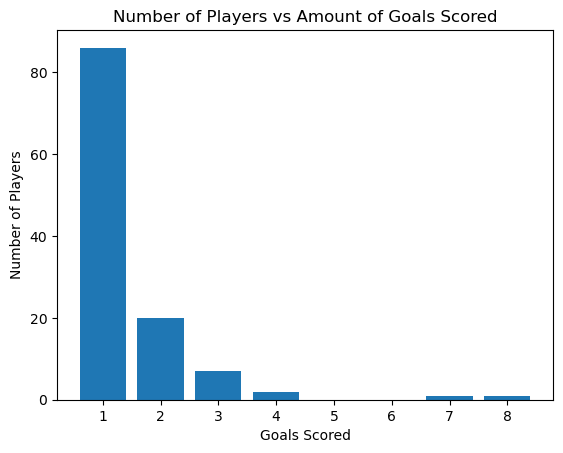

In [46]:
# Plot a bar chart for players who scored goals

plt.bar(year_goals_count['goals'], year_goals_count['player'])
plt.title('Number of Players vs Amount of Goals Scored')
plt.xlabel('Goals Scored')
plt.ylabel('Number of Players')
plt.show()

## Analysis

7 and 8 goals were scored by one player each. Whereas 86 players scored 1 goal each.
This shows that the more goals that are scored the fewer the number of players that will score. 
No players scored 5 or 6 goals.

In [29]:
#Find oldest and youngest goal scorers
goal_scorers['birth_year'].agg(['min', 'max'])

min    1983
max    2004
Name: birth_year, dtype: int64

In [30]:
#Create labels bins
bins = [1982, 1986, 1989, 1992, 1995, 1998, 2001, 2004]

labels =["1983-1986", "1987-1989", "1990-1992", "1993-1995", "1996-1998", "1999-2001", "2002-2004"]

In [31]:
#Copy dataframe
scorer_group=goal_scorers.copy()

#Use `pd.cut` to categorize birth year based on the bins.
scorer_group["Range of goal scorers"] = pd.cut(scorer_group["birth_year"], bins, labels=labels)
scorer_group

,player,birth_year,goals,Range of goal scorers
14,Achraf Dari,1999,1,1999-2001
16,Adrien Rabiot,1995,1,1993-1995
25,Aleksandar Mitrović,1994,2,1993-1995
30,Alexis Mac Allister,1998,1,1996-1998
45,Alphonso Davies,2000,1,1999-2001
...,...,...,...,...
662,Youssef En-Nesyri,1997,2,1996-1998
671,Zakaria Aboukhlal,2000,1,1999-2001
672,Álvaro Morata,1992,3,1990-1992
675,Ángel Di María,1988,1,1987-1989


In [32]:
#Calculating sums for ranges 
group_count = scorer_group.groupby(["Range of goal scorers"])["player"].count()
goals_sum = scorer_group.groupby(["Range of goal scorers"])["goals"].sum()

In [33]:
#Count goal scorers per age range
group_count

Range of goal scorers
1983-1986     3
1987-1989     8
1990-1992    25
1993-1995    27
1996-1998    29
1999-2001    22
2002-2004     3
Name: player, dtype: int64

In [34]:
#Count the total number of goals scored per age range
goals_sum

Range of goal scorers
1983-1986     6
1987-1989    17
1990-1992    33
1993-1995    32
1996-1998    44
1999-2001    35
2002-2004     3
Name: goals, dtype: int64

In [35]:
#Create summary dataframe
scoring_summary = pd.DataFrame({"No. of Goals Scorers": group_count,
                                 "Sum of Goal Scored": goals_sum})
scoring_summary

,No. of Goals Scorers,Sum of Goal Scored
Range of goal scorers,,
1983-1986,3,6
1987-1989,8,17
1990-1992,25,33
1993-1995,27,32
1996-1998,29,44
1999-2001,22,35
2002-2004,3,3


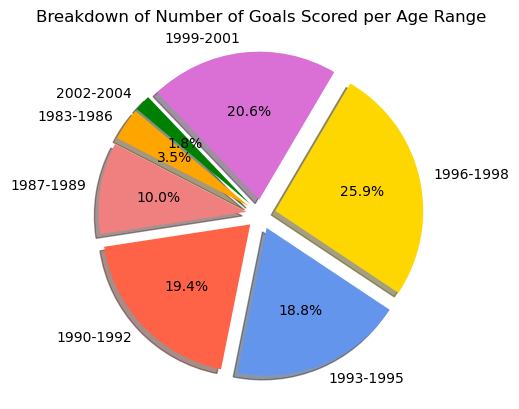

In [36]:
# Labels for the sections of our pie chart
labels = goals_sum.index.values

# The values of each section of the pie chart
sizes = goals_sum.values

# The colors of each section of the pie chart
colors = ["orange", "lightcoral",  'tomato', 'cornflowerblue', 'gold', 'orchid', 'green']

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Breakdown of Number of Goals Scored per Age Range")
plt.show()

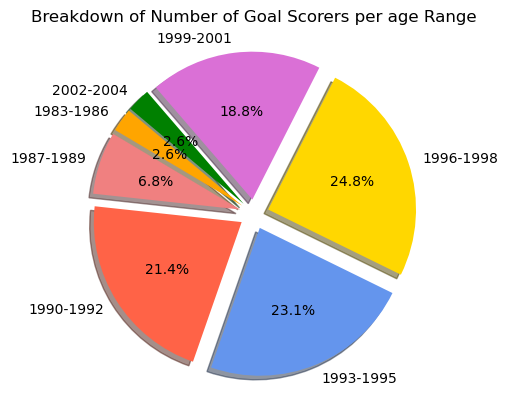

In [37]:
# Labels for the sections of our pie chart
labels = group_count.index.values

# The values of each section of the pie chart
sizes = group_count.values

# The colors of each section of the pie chart
colors = ["orange", "lightcoral",  'tomato', 'cornflowerblue', 'gold', 'orchid', 'green']

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Breakdown of Number of Goal Scorers per age Range")

plt.show()

## Analysis

The youngest age group contributed the least amount of goals (2002-2004, 3 goals), 1.8%.
The group with the most amount of goals was 1996-1998, 25.9%. (44 goals)

The youngest and oldest age groups had the  least number of goal scorer contributions. This would be indicative of these age groups playing the least amount of time, 2.6%. (1983-86, 2002-04,) 3 players each.

The “peak” playing time for these players contributed the largest amount of goal scorers, 24.8%. (1996-1998, 29 players).
